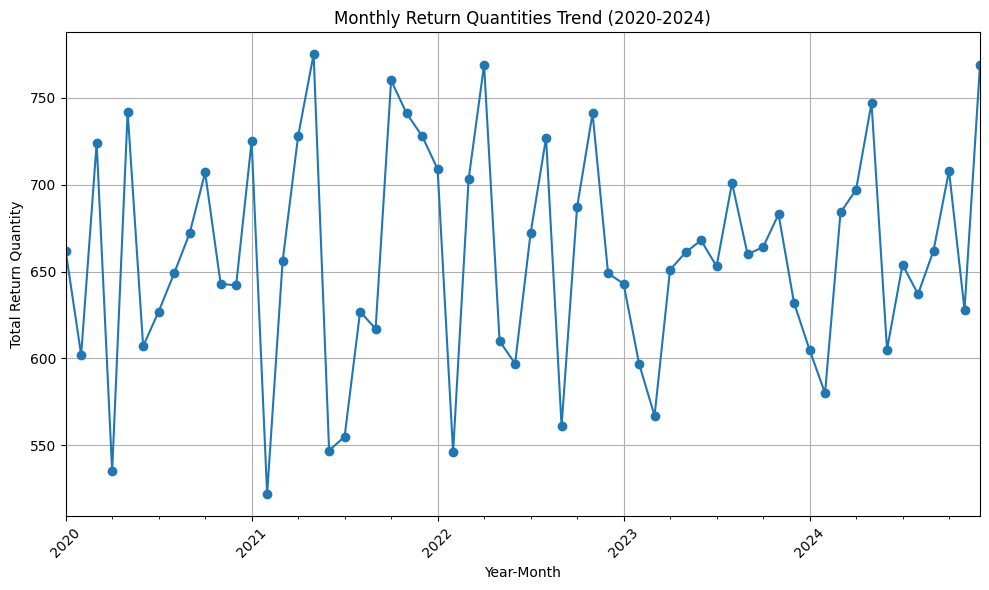

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv(r'C:\Users\Nidhi\OneDrive\Desktop\SNU CLG\HACKATHONS\khacks!\datsets\return_logistics_dataset.csv')

# Ensure the Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year-Month for trend analysis
df['YearMonth'] = df['Date'].dt.to_period('M')

# Group by Year-Month and sum the Return Quantities
monthly_trends = df.groupby('YearMonth')['Return Quantity'].sum()

# Plot the trend
plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='line', marker='o')
plt.title("Monthly Return Quantities Trend (2020-2024)")
plt.xlabel("Year-Month")
plt.ylabel("Total Return Quantity")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


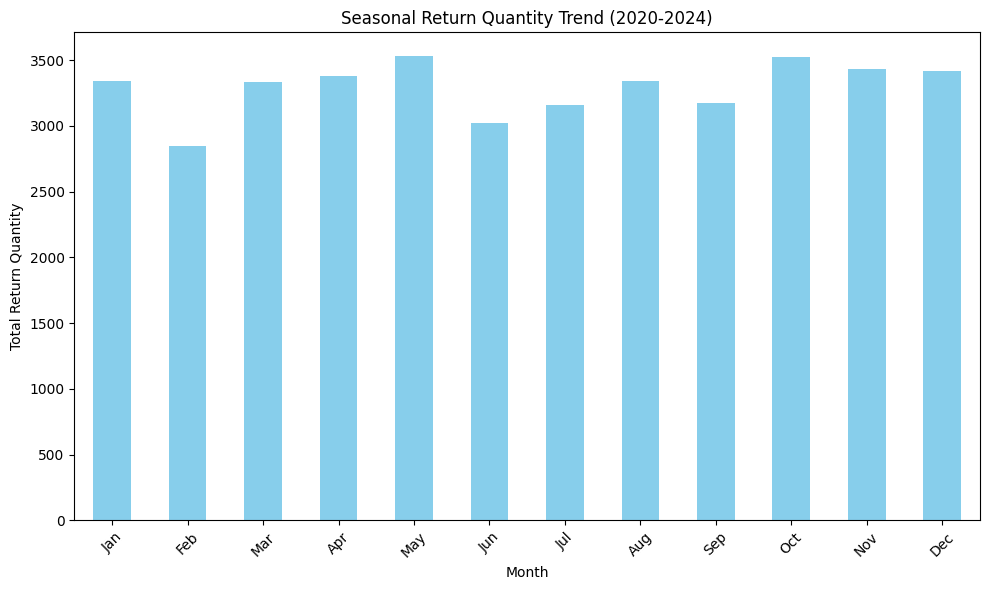

In [10]:
# Cell 2: Seasonal Patterns in Returns

# Extract month for seasonal analysis
df['Month'] = df['Date'].dt.month

# Group by Month and sum the Return Quantities
seasonal_trends = df.groupby('Month')['Return Quantity'].sum()

# Plot the seasonal pattern
plt.figure(figsize=(10, 6))
seasonal_trends.plot(kind='bar', color='skyblue')
plt.title("Seasonal Return Quantity Trend (2020-2024)")
plt.xlabel("Month")
plt.ylabel("Total Return Quantity")
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
plt.tight_layout()
plt.show()


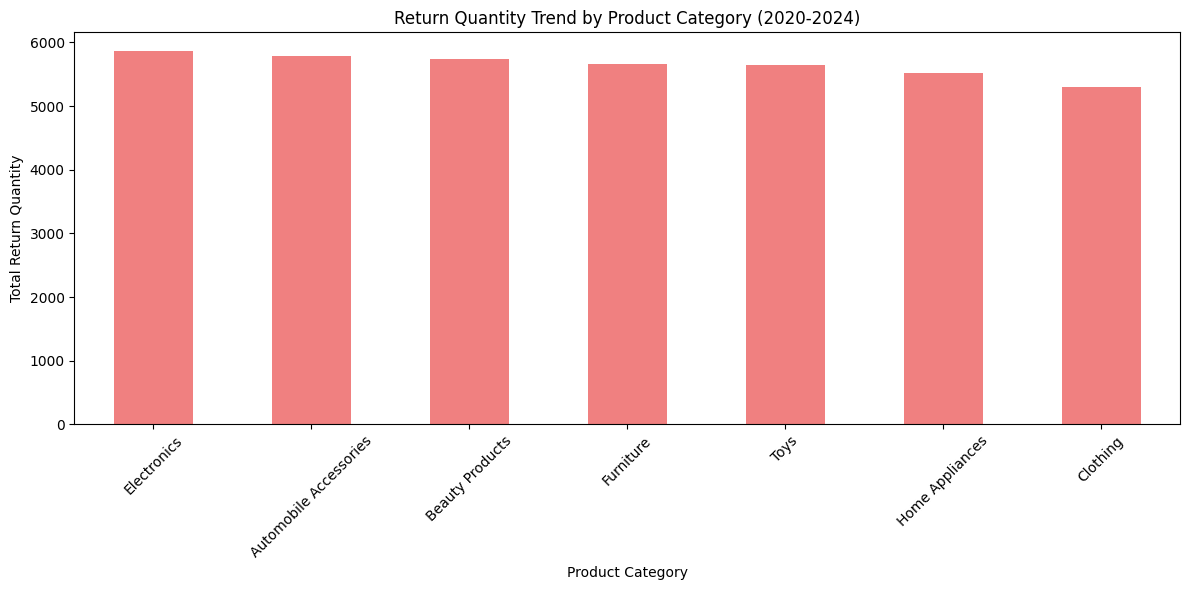

In [11]:
# Cell 3: Return Quantity Trend by Product Category

# Group by Product Category and sum the Return Quantities
category_trends = df.groupby('Product Category')['Return Quantity'].sum().sort_values(ascending=False)

# Plot the trend
plt.figure(figsize=(12, 6))
category_trends.plot(kind='bar', color='lightcoral')
plt.title("Return Quantity Trend by Product Category (2020-2024)")
plt.xlabel("Product Category")
plt.ylabel("Total Return Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


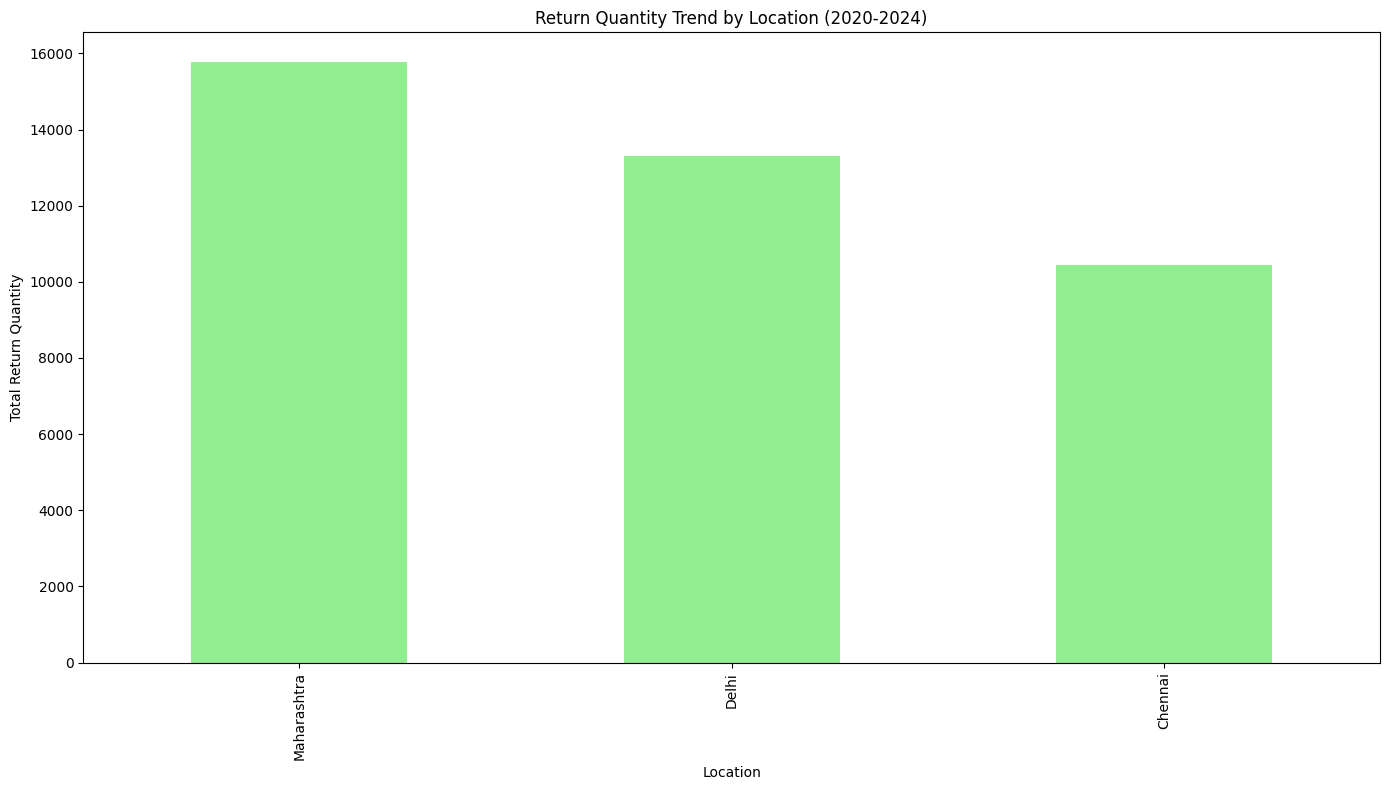

In [12]:
# Cell 4: Return Quantity by Location

# Group by Location and sum the Return Quantities
location_trends = df.groupby('Location')['Return Quantity'].sum().sort_values(ascending=False)

# Plot the trend
plt.figure(figsize=(14, 8))
location_trends.plot(kind='bar', color='lightgreen')
plt.title("Return Quantity Trend by Location (2020-2024)")
plt.xlabel("Location")
plt.ylabel("Total Return Quantity")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


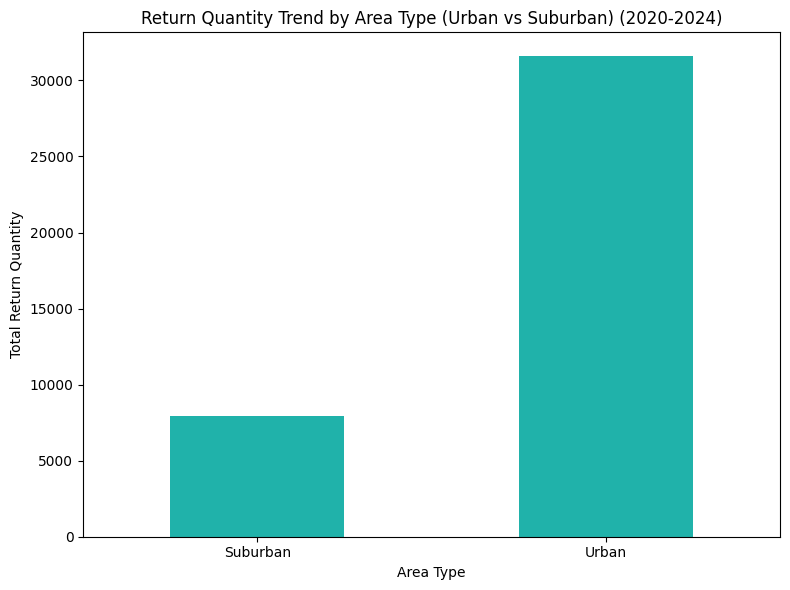

In [14]:
# Cell 5: Return Quantity by Area Type (Urban vs Suburban)

# Group by Area Type (Urban/Suburban) and sum the Return Quantities
area_type_trends = df.groupby('Area Type')['Return Quantity'].sum()

# Plot the trend
plt.figure(figsize=(8, 6))
area_type_trends.plot(kind='bar', color='lightseagreen')
plt.title("Return Quantity Trend by Area Type (Urban vs Suburban) (2020-2024)")
plt.xlabel("Area Type")
plt.ylabel("Total Return Quantity")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


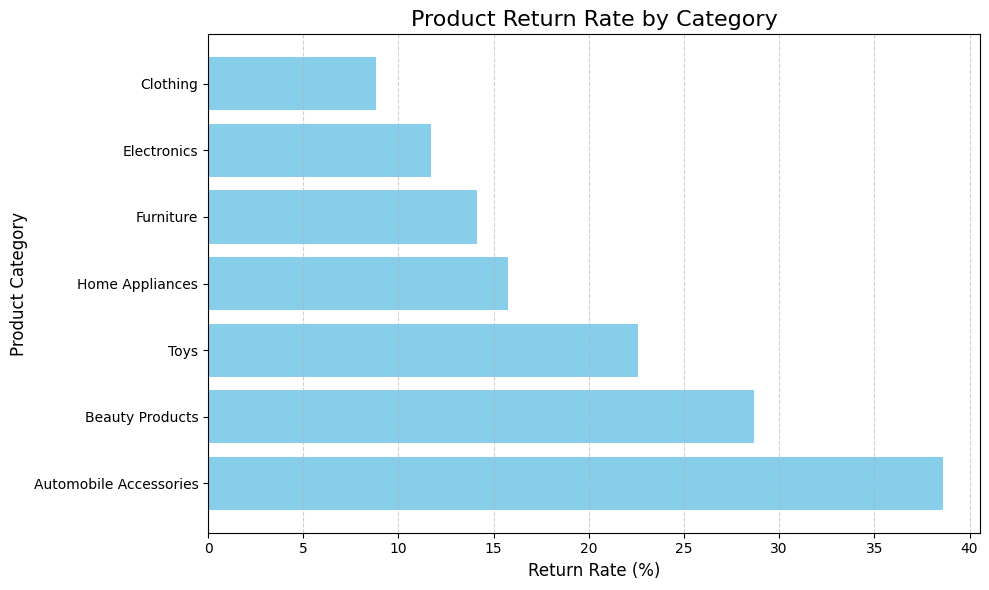

,Product Category,Return Rate (%)
0,Automobile Accessories,38.620
1,Beauty Products,28.700
6,Toys,22.564
5,Home Appliances,15.780
4,Furniture,14.155
3,Electronics,11.732
2,Clothing,8.825


In [18]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\Nidhi\OneDrive\Desktop\SNU CLG\HACKATHONS\khacks!\datsets\return_logistics_dataset.csv')

# Assume the total number of items sold per category is known (or estimated).
# Here we simulate a sales volume based on some assumptions
category_sales = {
    "Electronics": 50000,
    "Clothing": 60000,
    "Furniture": 40000,
    "Home Appliances": 35000,
    "Toys": 25000,
    "Automobile Accessories": 15000,
    "Beauty Products": 20000
}

# Calculate return rates for each product category
category_return_data = df.groupby('Product Category')['Return Quantity'].sum().reset_index()
category_return_data['Total Sales'] = category_return_data['Product Category'].map(category_sales)
category_return_data['Return Rate (%)'] = (category_return_data['Return Quantity'] / category_return_data['Total Sales']) * 100

# Sort the categories by return rate in descending order
category_return_data = category_return_data.sort_values('Return Rate (%)', ascending=False)

# Plotting the return rates for each product category
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(category_return_data['Product Category'], category_return_data['Return Rate (%)'], color='skyblue')
plt.title('Product Return Rate by Category', fontsize=16)
plt.xlabel('Return Rate (%)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Display the return rate data
category_return_data[['Product Category', 'Return Rate (%)']]


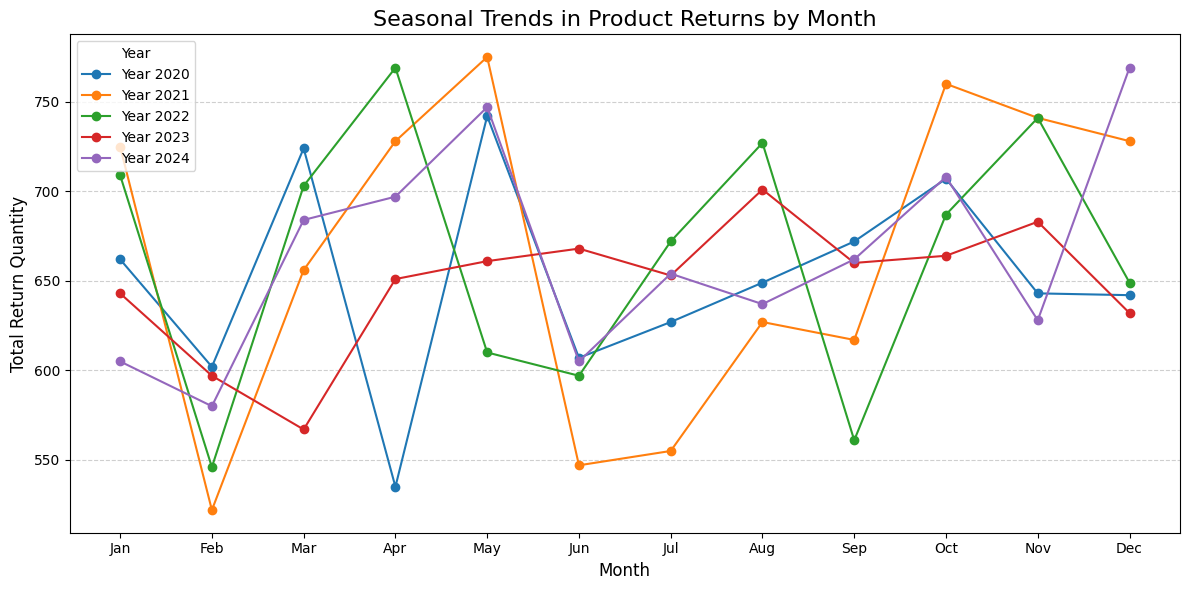

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2020,662,602,724,535,742,607,627,649,672,707,643,642
2021,725,522,656,728,775,547,555,627,617,760,741,728
2022,709,546,703,769,610,597,672,727,561,687,741,649
2023,643,597,567,651,661,668,653,701,660,664,683,632
2024,605,580,684,697,747,605,654,637,662,708,628,769


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'C:\Users\Nidhi\OneDrive\Desktop\SNU CLG\HACKATHONS\khacks!\datsets\return_logistics_dataset.csv')

# Extract Month and Year from Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

# Group by Year and Month to analyze seasonal return trends
monthly_returns = df.groupby(['Year', 'Month'])['Return Quantity'].sum().reset_index()

# Pivot the table to have months as columns and years as rows
monthly_returns_pivot = monthly_returns.pivot(index='Year', columns='Month', values='Return Quantity')

# Plot seasonal trends for each year
plt.figure(figsize=(12, 6))
for year in monthly_returns_pivot.index:
    plt.plot(monthly_returns_pivot.columns, monthly_returns_pivot.loc[year], marker='o', label=f'Year {year}')

plt.title('Seasonal Trends in Product Returns by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Return Quantity', fontsize=12)
plt.xticks(monthly_returns_pivot.columns, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Display monthly returns data
monthly_returns_pivot


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

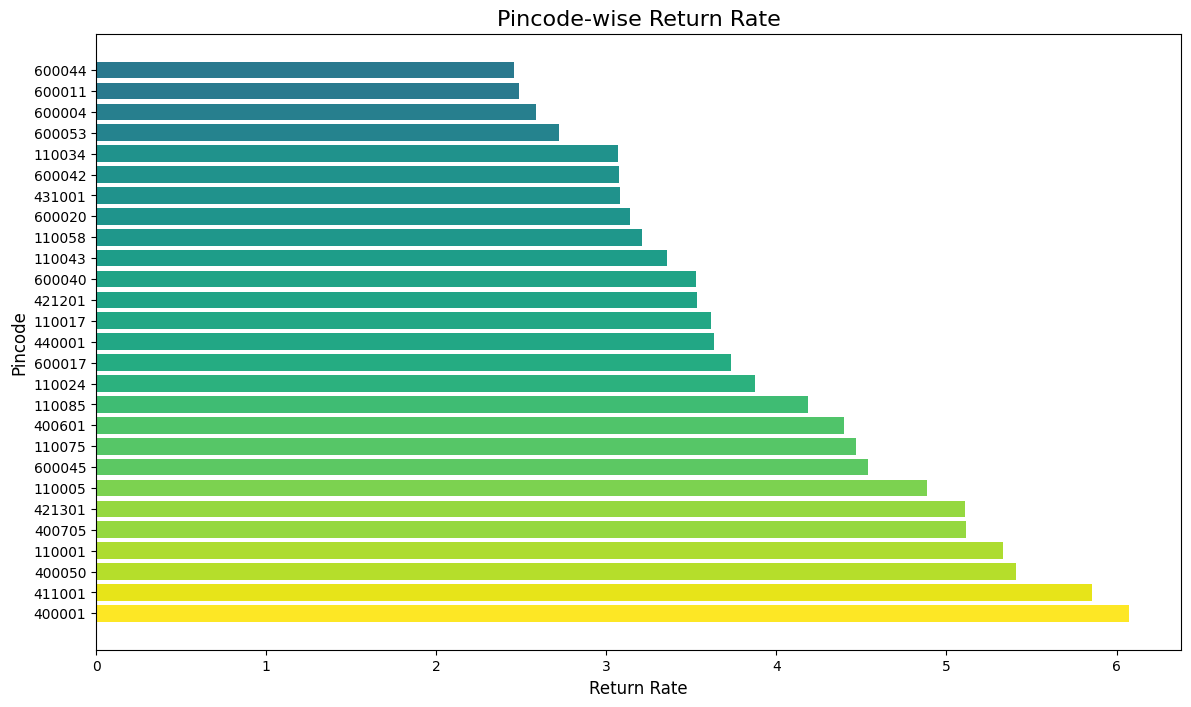

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Pincode to calculate the total returns and total orders (based on return quantity)
pincode_returns = df.groupby('Pin Code').agg(
    total_returns=('Return Quantity', 'sum'),
    total_orders=('Order ID', 'count')
).reset_index()

# Calculate return rate for each pincode
pincode_returns['Return Rate'] = pincode_returns['total_returns'] / pincode_returns['total_orders']

# Sort by return rate in descending order to see which pincodes have higher return rates
pincode_returns = pincode_returns.sort_values('Return Rate', ascending=False)

# Plot the return rate for each pincode
plt.figure(figsize=(14, 8))
plt.barh(pincode_returns['Pin Code'].astype(str), pincode_returns['Return Rate'], color=plt.cm.viridis(pincode_returns['Return Rate'] / max(pincode_returns['Return Rate'])))
plt.title('Pincode-wise Return Rate', fontsize=16)
plt.xlabel('Return Rate', fontsize=12)
plt.ylabel('Pincode', fontsize=12)
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=max(pincode_returns['Return Rate']))), label='Return Rate')
plt.tight_layout()
plt.show()

# Display the top 5 pincodes with the highest return rate
top_5_pincodes = pincode_returns.head(5)
top_5_pincodes


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


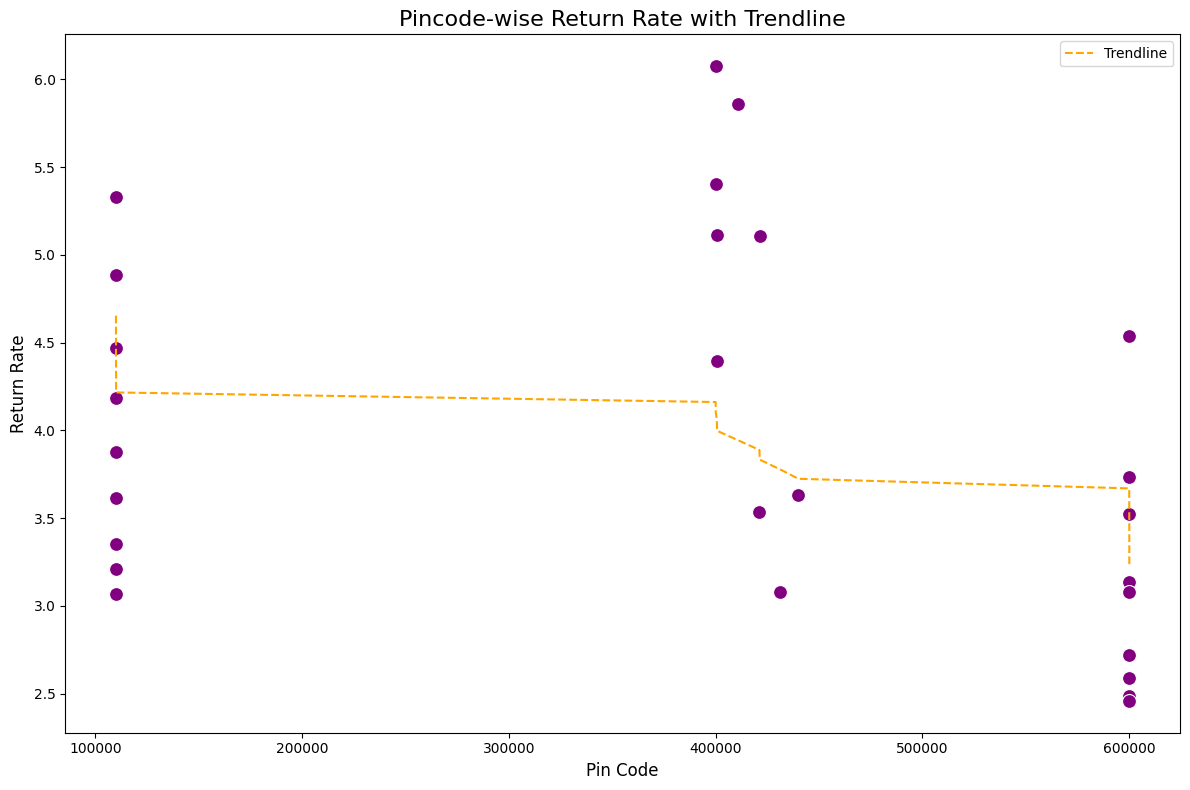

In [24]:
from scipy import stats

# Pincode return rate data
pincode_returns = df.groupby('Pin Code').agg(
    total_returns=('Return Quantity', 'sum'),
    total_orders=('Order ID', 'count')
).reset_index()
pincode_returns['Return Rate'] = pincode_returns['total_returns'] / pincode_returns['total_orders']

# Scatter plot + trendline
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pincode_returns, x='Pin Code', y='Return Rate', color='purple', s=100)

# Fit a regression line (Trendline)
slope, intercept, r_value, p_value, std_err = stats.linregress(range(len(pincode_returns)), pincode_returns['Return Rate'])
plt.plot(pincode_returns['Pin Code'], slope * range(len(pincode_returns)) + intercept, color='orange', linestyle='--', label="Trendline")

plt.title('Pincode-wise Return Rate with Trendline', fontsize=16)
plt.xlabel('Pin Code', fontsize=12)
plt.ylabel('Return Rate', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


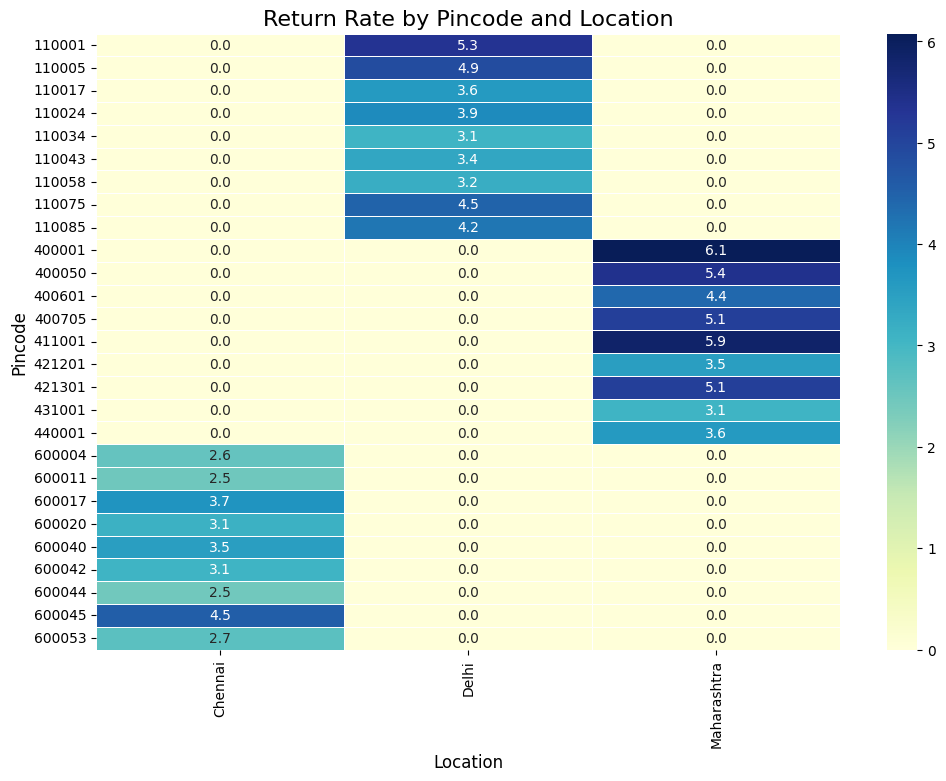

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the total return rate per pincode (average return quantity for each pincode)
pincode_return_rate = df.groupby('Pin Code')['Return Quantity'].mean().reset_index()

# Pivot the data for heatmap plotting
pincode_location_return = df.groupby(['Pin Code', 'Location'])['Return Quantity'].mean().unstack(fill_value=0)

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pincode_location_return, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=.5)
plt.title("Return Rate by Pincode and Location", fontsize=16)
plt.ylabel("Pincode", fontsize=12)
plt.xlabel("Location", fontsize=12)
plt.xticks(rotation=90)
plt.show()
